In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import image_structure_maker
from reader import MovieObject

In [73]:
fname = '../Data/Pos3_Temp20_GrowthTime7min_WaitRT60min_FastVideo_Cooling1Cper1s.21Oct2019_05.24.18.movie'
m = MovieObject(fname)
N_frames = 1000

In [74]:
move = image_structure_maker.Movie(m,N_frames)

In [75]:
move.get_iqtau()

We are 0.00 done
We are 2.00 done
We are 4.00 done
We are 6.00 done
We are 8.00 done
We are 10.00 done
We are 12.00 done
We are 14.00 done
We are 16.00 done
We are 18.00 done
We are 20.00 done
We are 22.00 done
We are 24.00 done
We are 26.00 done
We are 28.00 done
We are 30.00 done
We are 32.00 done
We are 34.00 done
We are 36.00 done
We are 38.00 done
We are 40.00 done
We are 42.00 done
We are 44.00 done
We are 46.00 done
We are 48.00 done
We are 50.00 done
We are 52.00 done
We are 54.00 done
We are 56.00 done
We are 58.00 done
We are 60.00 done
We are 62.00 done
We are 64.00 done
We are 66.00 done
We are 68.00 done
We are 70.00 done
We are 72.00 done
We are 74.00 done
We are 76.00 done
We are 78.00 done
We are 80.00 done
We are 82.00 done
We are 84.00 done
We are 86.00 done
We are 88.00 done
We are 90.00 done
We are 92.00 done
We are 94.00 done
We are 96.00 done
We are 98.00 done


In [76]:
move.get_image(300)

In [ ]:
move.save_image(fname)

In [77]:
maximum = np.max(move.q_tau_structure.transpose()[1:,1:])

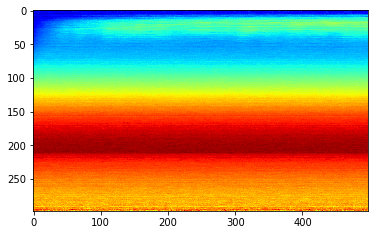

In [78]:
plt.imshow(move.q_tau_structure[1:-1,1:-1].transpose() / maximum,cmap = "jet")

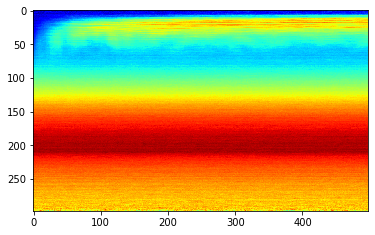

In [9]:
plt.imshow(move.q_tau_structure[1:-1,1:-1].transpose() / maximum,cmap = "jet")

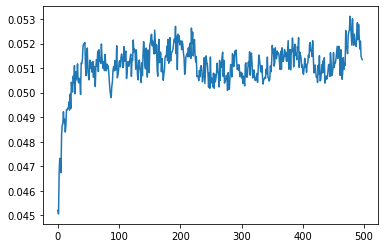

In [79]:
plt.plot(move.q_tau_structure[1:-1,1:-1][:,50])

In [80]:
# now we fit!
def func_to_fit(x,a,b,c):
    return a*(1-np.exp(-x/b))+c

In [81]:
def diffusive_monodisperse_fit(q,D):
    return 1/q**2 * 1/D

In [82]:
from scipy.optimize import curve_fit

In [83]:
q_vals = np.arange(1,250)

cf_vals = []

from copy import copy

for i in q_vals:

    x = np.arange(0,500)[1:-1]
    y = move.q_tau_structure[1:-1,1:-1][:,i] #choose which one!

    try:
        cf = curve_fit(func_to_fit,x,y,[y[-1]-y[0],100,y[0]])
    except:
        cf = [0]
    cf_vals.append(copy(cf))

/home/wtk23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/wtk23/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [84]:
#second parameter is the important one!

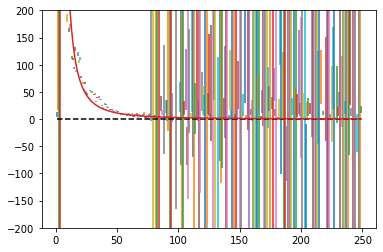

In [85]:
q_for_fitting = []
b_for_fitting = []
b_sigma_for_fitting = []

for q,cf in zip(q_vals, cf_vals):
    if cf != [0]:
        plt.errorbar(q,cf[0][1],np.sqrt(cf[1][1][1]))
        q_for_fitting.append(q)
        b_for_fitting.append(cf[0][1])
        b_sigma_for_fitting.append(np.sqrt(cf[1][1][1]))
plt.ylim(-200,200)

#now we fit a 1/x^2 to this.
cf = curve_fit(diffusive_monodisperse_fit,
               q_for_fitting,b_for_fitting,
               sigma = b_sigma_for_fitting,
               p0 = 28000)

pred_b_vals = diffusive_monodisperse_fit(np.array(q_for_fitting),
                                         cf[0][0])
plt.plot(q_for_fitting, pred_b_vals,'k--')

plt.plot(q_for_fitting, 1/np.array(q_for_fitting)**2*28000)

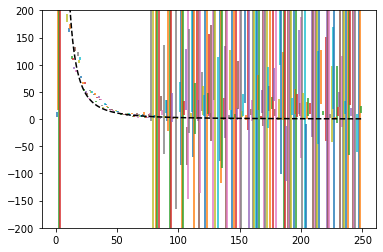

In [91]:
q_for_fitting = []
b_for_fitting = []
b_sigma_for_fitting = []

for q,cf in zip(q_vals, cf_vals):
    if cf != [0]:
        plt.errorbar(q,cf[0][1],np.sqrt(cf[1][1][1]))
        q_for_fitting.append(q)
        b_for_fitting.append(cf[0][1])
        b_sigma_for_fitting.append(np.sqrt(cf[1][1][1]))
plt.ylim(-200,200)

#now we fit a 1/x^2 to this.
cf = curve_fit(diffusive_monodisperse_fit,
               q_for_fitting[10:80],b_for_fitting[10:80],
               sigma = b_sigma_for_fitting[10:80],
               p0 = 1/28000)

pred_b_vals = diffusive_monodisperse_fit(np.array(q_for_fitting),
                                         cf[0][0])
plt.plot(q_for_fitting, pred_b_vals,'k--')

#plt.plot(q_for_fitting, 1/np.array(q_for_fitting)**2*28000)